In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('../data/ml_project1_data.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
X = df.drop(['Response'],axis=1)
y = df[['Response']]

In [6]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2)

In [7]:
X_train.shape,X_test.shape

((1792, 28), (448, 28))

# Clean

In [8]:
X_train.drop(['Z_CostContact', 'Z_Revenue', 'ID', 'Dt_Customer'], axis = 1, inplace = True)

In [9]:
X_train.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 23
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
dtype: int64

In [10]:
X_train.dropna(inplace=True)

In [11]:
marital_status_count = X_train.groupby('Marital_Status')['Marital_Status'].count()
marital_status_count

Marital_Status
Absurd        2
Alone         3
Divorced    184
Married     682
Single      371
Together    468
Widow        57
YOLO          2
Name: Marital_Status, dtype: int64

## Outliers

In [12]:
X_train['Age'] = X_train['Year_Birth'].apply(lambda x: 2020-x)
X_train.drop(['Year_Birth'], axis = 1, inplace = True)

In [13]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [14]:
import plotly.express as px

In [15]:
X_train.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age
1084,Master,Single,75345.0,0,0,16,918,57,842,99,...,8,6,3,0,0,0,1,0,0,50
1974,2n Cycle,Married,54690.0,1,1,76,111,16,37,7,...,1,5,3,0,0,0,0,0,0,49
293,Graduation,Together,16626.0,2,0,76,8,3,22,21,...,0,3,9,0,0,0,0,0,0,49
1244,PhD,Together,27683.0,1,0,90,152,9,121,12,...,2,4,8,0,0,0,0,0,0,42
1128,Basic,Single,16581.0,0,0,51,1,3,4,2,...,0,3,4,0,0,0,0,0,0,35


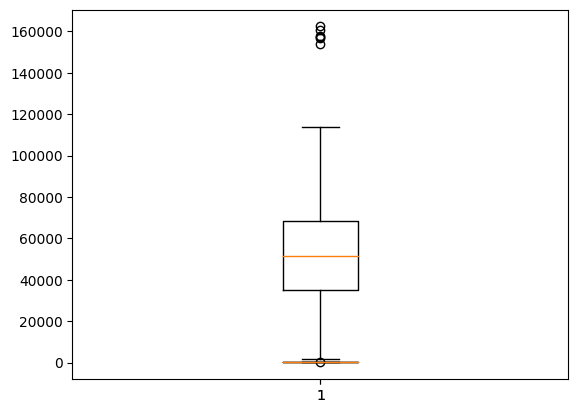

In [16]:
plt.figure
plt.boxplot(X_train.Age)
plt.boxplot(X_train.Income)
plt.show()

In [17]:
income_Q3 = X_train.Income.quantile(0.75)
income_Q1 = X_train.Income.quantile(0.25)

income_IQR = income_Q3 - income_Q1
income_upper_fence = income_Q3 + (1.5*income_IQR)


age_Q3 = X_train.Age.quantile(0.75)
age_Q1 = X_train.Age.quantile(0.25)

age_IQR = age_Q3 - age_Q1
age_upper_fence = age_Q3 + (1.5*age_IQR)


In [18]:
X_train = X_train[X_train['Income']<income_upper_fence]
X_train = X_train[X_train['Age'] < age_upper_fence]

# Profiles

### Education

In [19]:
education = X_train.groupby('Education')['Education'].count()
education_level = X_train.Education.unique()
education_level.sort()

In [20]:
education

Education
2n Cycle      154
Basic          43
Graduation    895
Master        305
PhD           365
Name: Education, dtype: int64

<BarContainer object of 5 artists>

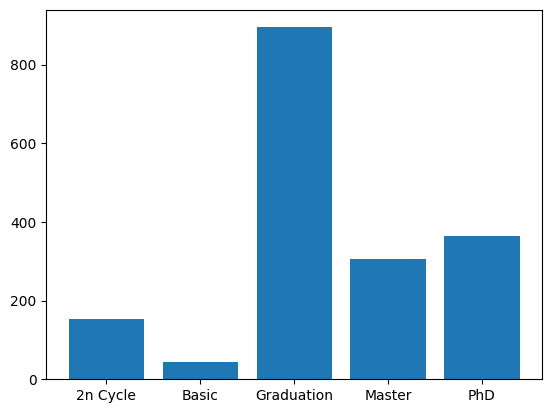

In [21]:
plt.bar(education_level,education)

### Marital status

In [22]:
marital_status = X_train.groupby('Marital_Status')['Marital_Status'].count()
other = marital_status_count[marital_status_count < 4]
df['Marital_Status']= df['Marital_Status'].apply(lambda x: 'Other' if x in other else x)

marital_des = X_train.Marital_Status.unique()
marital_des.sort()

In [23]:
marital_status

Marital_Status
Absurd        2
Alone         3
Divorced    183
Married     680
Single      371
Together    464
Widow        57
YOLO          2
Name: Marital_Status, dtype: int64

In [24]:
#plt.bar(marital_des,marital_status)

# Relationships

In [25]:
edu_dummies = pd.get_dummies(X_train['Education'],dtype=int)

marital_dummies = pd.get_dummies(X_train['Marital_Status'], dtype = int)

In [26]:
X_train = pd.concat([X_train, edu_dummies],axis=1)

X_train.drop(['Education','Marital_Status'], axis = 1, inplace = True)

In [27]:
corr = X_train.corr(method='pearson')

<Axes: >

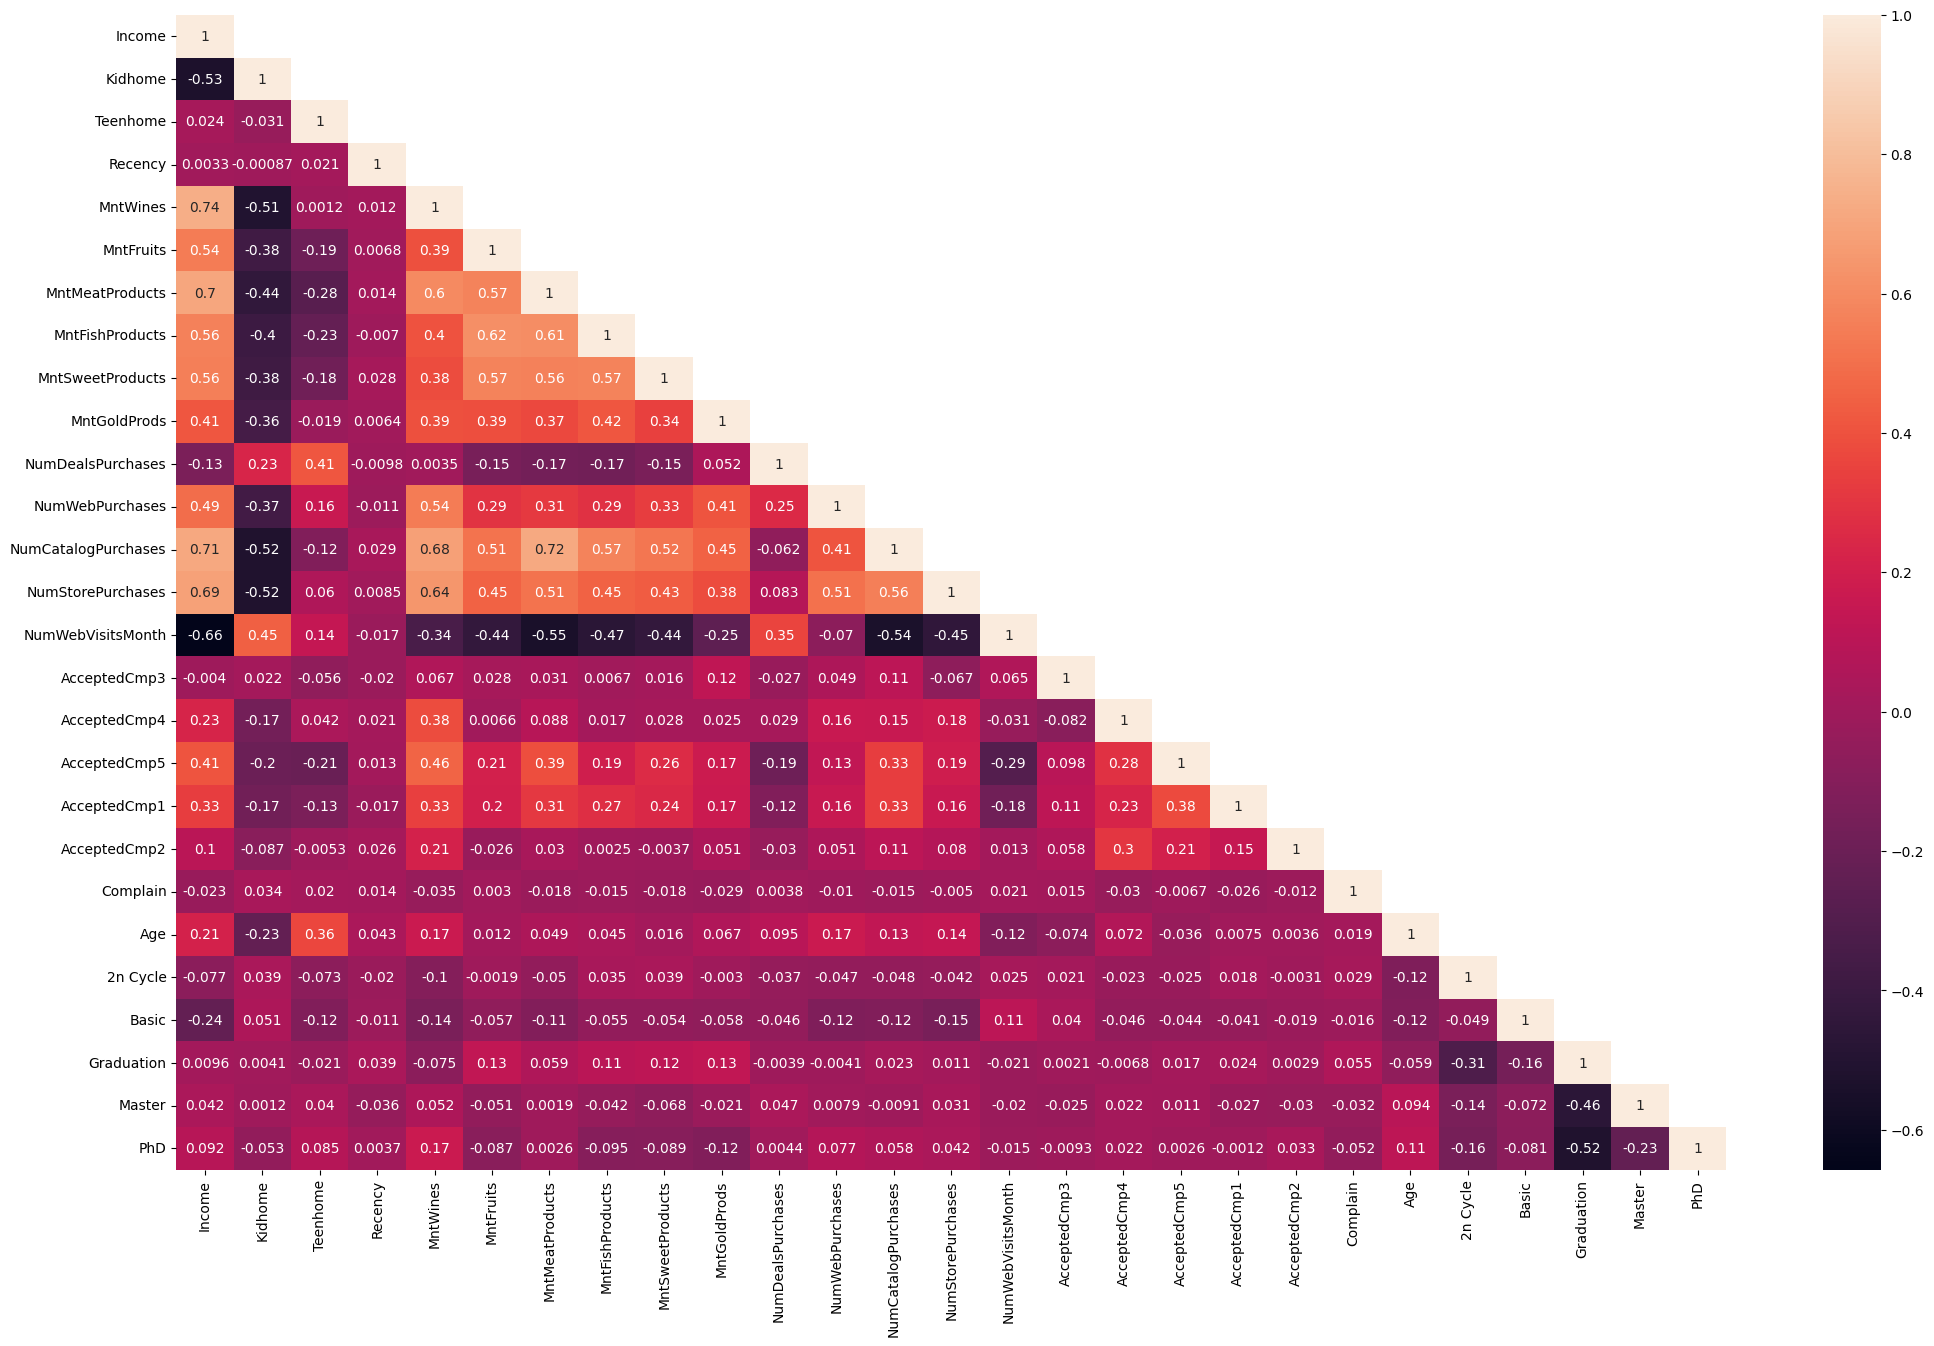

In [28]:
plt.figure(figsize=(25,15))
masker = np.triu(np.ones_like(corr),k=1).astype(dtype = bool)
sns.heatmap(corr,annot=True,mask=masker)

In [29]:
corr.where(masker).unstack().dropna().sort_values()

NumWebVisitsMonth    Income                -0.657478
                     MntMeatProducts       -0.547194
                     NumCatalogPurchases   -0.537701
Kidhome              Income                -0.534101
PhD                  Graduation            -0.519338
                                              ...   
NumStorePurchases    Income                 0.687281
MntMeatProducts      Income                 0.702220
NumCatalogPurchases  Income                 0.711590
                     MntMeatProducts        0.715219
MntWines             Income                 0.735936
Length: 351, dtype: float64

# Segmentation

In [30]:
from sklearn.cluster import KMeans

In [31]:
X_train.tail()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,2n Cycle,Basic,Graduation,Master,PhD
1844,65735.0,1,1,37,239,7,119,4,15,11,...,0,0,0,0,55,0,0,0,1,0
1614,31353.0,1,1,24,10,0,10,3,1,7,...,0,0,0,0,43,0,0,1,0,0
1737,77437.0,0,0,70,560,21,442,29,44,29,...,1,0,0,0,57,0,0,1,0,0
1015,59412.0,0,0,56,90,67,165,30,43,11,...,0,0,0,0,69,0,0,0,1,0
1402,37716.0,0,1,4,97,1,41,6,2,41,...,0,0,0,0,67,0,0,1,0,0


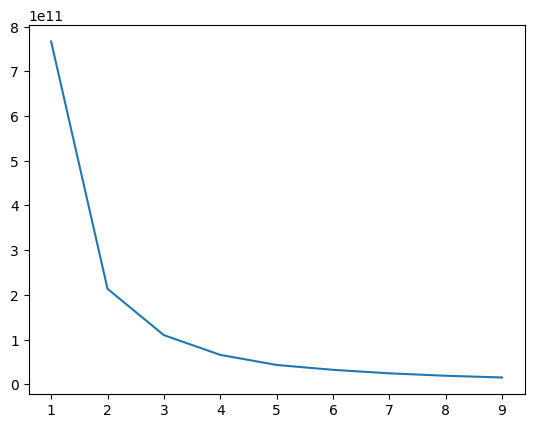

In [32]:
k_range = range(1,10)
sse =[]
for k in k_range:
    km = KMeans(n_clusters=k,n_init=9)
    km.fit(X_train)
    sse.append(km.inertia_)
plt.plot(k_range,sse)

In [33]:
km = KMeans(n_clusters=3,n_init=10)

In [34]:
clusters = km.fit_predict(X_train)

In [35]:
X_train

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,2n Cycle,Basic,Graduation,Master,PhD
1084,75345.0,0,0,16,918,57,842,99,38,133,...,0,1,0,0,50,0,0,0,1,0
1974,54690.0,1,1,76,111,16,37,7,9,18,...,0,0,0,0,49,1,0,0,0,0
293,16626.0,2,0,76,8,3,22,21,1,13,...,0,0,0,0,49,0,0,1,0,0
1244,27683.0,1,0,90,152,9,121,12,12,45,...,0,0,0,0,42,0,0,0,0,1
1128,16581.0,0,0,51,1,3,4,2,3,11,...,0,0,0,0,35,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,65735.0,1,1,37,239,7,119,4,15,11,...,0,0,0,0,55,0,0,0,1,0
1614,31353.0,1,1,24,10,0,10,3,1,7,...,0,0,0,0,43,0,0,1,0,0
1737,77437.0,0,0,70,560,21,442,29,44,29,...,1,0,0,0,57,0,0,1,0,0
1015,59412.0,0,0,56,90,67,165,30,43,11,...,0,0,0,0,69,0,0,0,1,0


In [36]:
X_train['cluster'] = clusters

In [37]:
X_train.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Age,2n Cycle,Basic,Graduation,Master,PhD,cluster
1084,75345.0,0,0,16,918,57,842,99,38,133,...,1,0,0,50,0,0,0,1,0,2
1974,54690.0,1,1,76,111,16,37,7,9,18,...,0,0,0,49,1,0,0,0,0,0
293,16626.0,2,0,76,8,3,22,21,1,13,...,0,0,0,49,0,0,1,0,0,1
1244,27683.0,1,0,90,152,9,121,12,12,45,...,0,0,0,42,0,0,0,0,1,1
1128,16581.0,0,0,51,1,3,4,2,3,11,...,0,0,0,35,0,1,0,0,0,1


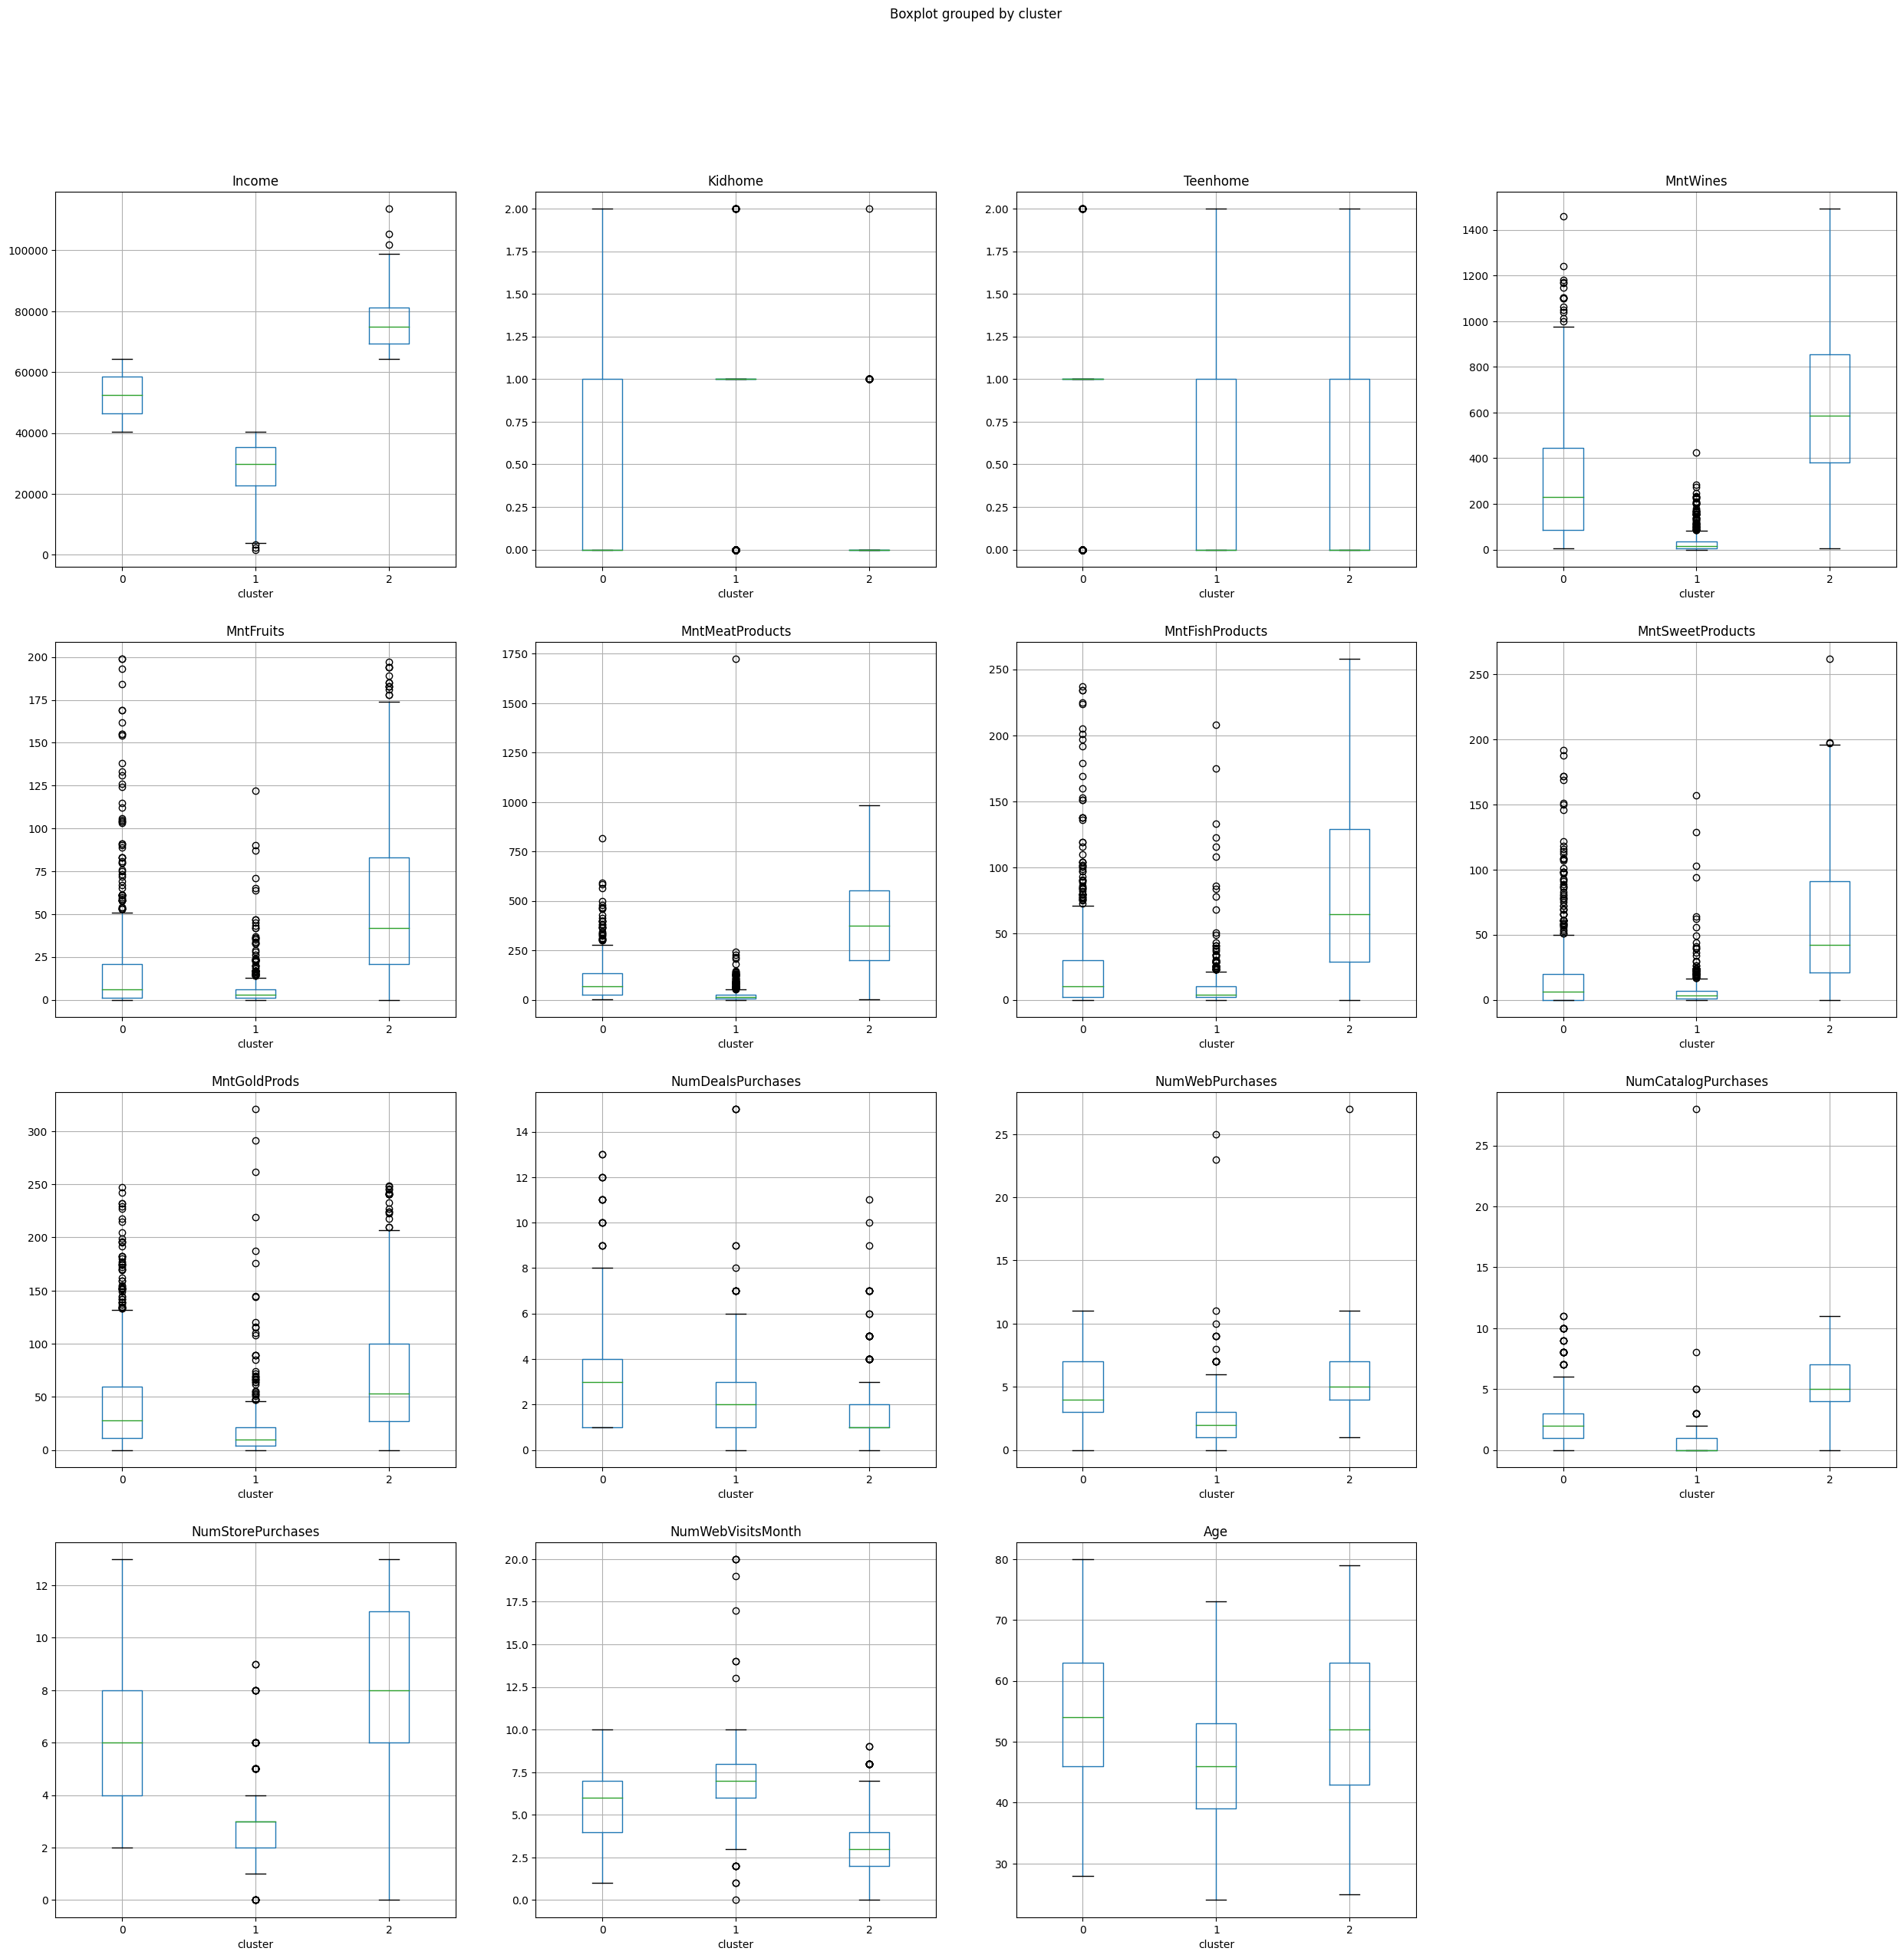

<Figure size 640x480 with 0 Axes>

In [38]:
selected_vars = ['Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age']



fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(30,30))


plt.figure()
for i,column in enumerate(selected_vars):
    row = i // 4
    col = i % 4
    X_train.boxplot(column, by = 'cluster', ax =axes[row][col])
plt.delaxes(ax=axes[3][3])
plt.tight_layout()
plt.show()

According to the data above

High income group: 
- Has 716 members
- Majority bought wine.
- Majority prefer store purchases.

Middle income group:
- Has 770 members 
- Majority bought wine.
- Majority prefer store purchases.

Low income group
- Has 719 members
- Majority bought wine.
- Majority prefer store purchases.
- group visits website the most.

### Model

/Users/mahloribaloyi/opt/anaconda3/bin/python3


In [49]:
!/Users/mahloribaloyi/opt/anaconda3/bin/python3 -m ipykernel install --name "my-venv"

Installed kernelspec my-venv in /usr/local/share/jupyter/kernels/my-venv
